In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
import requests
requests.__version__

'2.27.1'

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
#Add units=Imperial ???

# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid=

url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
#url specifies weather to the time the code was ran last
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid=2bc1023b8dad77b8640c75b326f719de&q=Boston


In [7]:
# video example
city = "London"
query_url = url + "&q=" + city

weather_responses = requests.get(query_url)
weather_json = weather_responses.json()

print(query_url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid=2bc1023b8dad77b8640c75b326f719de&q=London


In [8]:
#why do I not have the same array as in the video? is it because I left the
# units=Imperial within my url? 
# I was missing an '=' after the '&q' smh
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
#printed out in Farhenheit thanks to the imperial units
weather_json.get("main")

{'temp': 59.72,
 'feels_like': 58.26,
 'temp_min': 53.35,
 'temp_max': 65.3,
 'pressure': 1022,
 'humidity': 61}

In [10]:
# Make a 'Get' request for the city weather.

#this outputs <Response [200]>
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.

# 404 error
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":25.02,"feels_like":12.42,"temp_min":21.61,"temp_max":27.95,"pressure":1007,"humidity":59},"visibility":10000,"wind":{"speed":20.71,"deg":300,"gust":27.63},"clouds":{"all":75},"dt":1648472701,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1648463613,"sunset":1648508688},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 25.02,
  'feels_like': 12.42,
  'temp_min': 21.61,
  'temp_max': 27.95,
  'pressure': 1007,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 20.71, 'deg': 300, 'gust': 27.63},
 'clouds': {'all': 75},
 'dt': 1648472701,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648463613,
  'sunset': 1648508688},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Response [200] is a valid response

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Bston" #spelled wrong, hence not found
#city_weather = requests.get(city_url)
#if city_weather.status_code == 200:
#    print(f"City Weather found.")
#else:
 #   print(f"City weather not found.")
    
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 25.02,
  'feels_like': 12.42,
  'temp_min': 21.61,
  'temp_max': 27.95,
  'pressure': 1007,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 20.71, 'deg': 300, 'gust': 27.63},
 'clouds': {'all': 75},
 'dt': 1648472701,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648463613,
  'sunset': 1648508688},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# GEt JSON data
boston_data = city_weather.json()

boston_data['sys']["country"]

boston_data["dt"]

1648472701

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 27.95 59 75 20.71


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-28 13:05:01'

In [37]:
#psuedo code for pulling weather data from website for multiple cities

#import dependencies / initialize empty list
import time
from datetime import datetime
import requests
from config import weather_api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city_data = []

# Create counters.
record_count = 1
set_count = 1

In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
#is this how you unzip?
coordinates = list(lat_lngs)

In [40]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [41]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
broken hill au
udimskiy ru
kruisfontein za
tecoanapa mx
rikitea pf
bambous virieux mu
victoria sc
mar del plata ar
nikolskoye ru
butaritari ki
mys shmidta ru
hilo us
rikitea pf
cape town za
kapaa us
bluff nz
carnarvon au
cape town za
ushuaia ar
longyearbyen sj
oyama jp
svetlaya ru
sungaipenuh id
san cristobal ec
vilyuysk ru
illoqqortoormiut gl
bengkulu id
ushuaia ar
zelenoborskiy ru
tuktoyaktuk ca
punta arenas cl
albany au
cherskiy ru
kedrovyy ru
hobart au
izhmorskiy ru
bluff nz
kovur in
kapaa us
vaini to
chokurdakh ru
fort nelson ca
rapar in
ushuaia ar
alofi nu
gizo sb
khonuu ru
champerico gt
kutum sd
sao filipe cv
sao filipe cv
barrow us
airai pw
saint-philippe re
naze jp
los llanos de aridane es
aras no
qaanaaq gl
kapaa us
severo-kurilsk ru
punta arenas cl
rikitea pf
bluff nz
taoudenni ml
lagoa pt
hermanus za
albany au
busselton au
portland au
asau tv
sorong id
rikitea pf
atuona pf
bandarbeyla so
mataura pf
dikson ru
norman wells ca
oudtshoorn za
ucluelet ca
waipawa nz
pak

rikitea pf
khatanga ru
cabedelo br
kazalinsk kz
bambous virieux mu
sampit id
ushuaia ar
agadez ne
toamasina mg
mataura pf
chokurdakh ru
adrar dz
mecca sa
busselton au
nome us
foca ba
jardim br
chuy uy
puerto ayora ec
vaini to
bluff nz
bethel us
lianran cn
springbok za
broken hill au
carnarvon au
port elizabeth za
khatanga ru
albany au
ilulissat gl
new norfolk au
mar del plata ar
hithadhoo mv
torbay ca
vitorino freire br
baie-comeau ca
barrow us
jinxiang cn
mecca sa
luderitz na
mount gambier au
warqla dz
clarence town bs
cabo san lucas mx
nizhneyansk ru
luderitz na
louisbourg ca
korla cn
busselton au
tuatapere nz
chapais ca
rikitea pf
bredasdorp za
port alfred za
rikitea pf
cape town za
bluff nz
kapaa us
hermanus za
rikitea pf
rikitea pf
lebu cl
nikolskoye ru
ponta do sol cv
mrirt ma
saint-philippe re
benguela ao
qaanaaq gl
ushuaia ar
chickasha us
bredasdorp za
bowen au
port alfred za
korla cn
avarua ck
kununurra au
cape town za
nizhneyansk ru
yagodnoye ru
aklavik ca
busselton au
herman

dzhusaly kz
rikitea pf
yumen cn
havelock us
caravelas br
yulara au
barrow us
ipil ph
illoqqortoormiut gl
ulaangom mn
gornozavodsk ru
mataura pf
ushuaia ar
sao joao da barra br
hermanus za
aracaju br
saldanha za
buala sb
salalah om
buala sb
hudson bay ca
tasiilaq gl
warrnambool au
sorland no
camalu mx
atuona pf
mys shmidta ru
luderitz na
altamont us
busselton au
kitimat ca
castro cl
khatanga ru
panzhihua cn
busselton au
albany au
krasnoselkup ru
east london za
yar-sale ru
yellowknife ca
barrow us
upernavik gl
atambua id
jamestown sh
rikitea pf
quballat tn
panjab af
nizhneyansk ru
kahului us
tiksi ru
chimore bo
mataura pf
mabaruma gy
saint-philippe re
upernavik gl
cabo san lucas mx
rikitea pf
mitsamiouli km
merrill us
tuktoyaktuk ca
fortuna us
kodiak us
torbay ca
rikitea pf
port alfred za
faanui pf
rikitea pf
ushuaia ar
castro cl
hobart au
noumea nc
qaanaaq gl
saint-augustin ca
jamestown sh
petatlan mx
barrow us
rikitea pf
tuktoyaktuk ca
provideniya ru
emerald au
punta arenas cl
chopda i

In [47]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
city = cities
len(city)

597

In [49]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

#loop through cities list
for i, city in enumerate(cities): #how do I make this work for 500+ cities????
    
    #Group cities in sets of 50
    if i % 50 == 0 and i >=50:
    #    ^ means remainder of i/50     
    #two different counters will be needed for this step
        
        #1 one to log city count (1 to 50)
        set_count +=1
        #2 another for sets
        record_count = 1
        #can only call data once every minute
        time.sleep(60)
        
    #build city_url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Make API request for each city
    try:
        city_weather = requests.get(city_url).json()
        #Parse JSON weather for:
        #latitude and longitude
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        #max temp
        city_max_temp = city_weather["main"]["temp_max"]
        #humidity
        city_humidity = city_weather["main"]["humidity"]
        #Cloudiness
        city_clouds = city_weather["clouds"]["all"]
        #wind speed
        city_wind = city_weather["wind"]["speed"]
        #City, country, and date
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": cities[i],
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    except:
        print(f"City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 25 of Set 1 | albany
Processing Record 26 of Set 1 | broken hill
Processing Record 27 of Set 1 | udimskiy
Processing Record 28 of Set 1 | kruisfontein
Processing Record 29 of Set 1 | tecoanapa
Processing Record 30 of Set 1 | rikitea
Processing Record 31 of Set 1 | bambous virieux
Processing Record 32 of Set 1 | victoria
Processing Record 33 of Set 1 | mar del plata
Processing Record 34 of Set 1 | nikolskoye
Processing Record 35 of Set 1 | butaritari
Processing Record 36 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 1 | hilo
Processing Record 38 of Set 1 | cape town
Processing Record 39 of Set 1 | kapaa
Processing Record 40 of Set 1 | bluff
Processing Record 41 of Set 1 | carnarvon
Processing Record 42 of Set 1 | ushuaia
Processing Record 43 of Set 1 | longyearbyen
Processing Record 44 of Set 1 | oyama
Processing Record 45 of Set 1 | svetlaya
Processing Record 46 of Set 1 | sun

City not found. Skipping...
Processing Record 37 of Set 4 | perth
Processing Record 38 of Set 4 | saint-georges
Processing Record 39 of Set 4 | siocon
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | yaan
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | shelburne
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 48 of Set 4 | churapcha
Processing Record 49 of Set 4 | romanovo
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | praya
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | panchgani
Processing Record 4 of Set 5 | port augusta
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | kahului
Processing Record 8 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 9 of Set 5 |

Processing Record 25 of Set 8 | mrirt
City not found. Skipping...
Processing Record 26 of Set 8 | benguela
Processing Record 27 of Set 8 | chickasha
Processing Record 28 of Set 8 | bowen
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | yagodnoye
Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | laramie
Processing Record 34 of Set 8 | xining
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | lamu
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | leh
Processing Record 40 of Set 8 | kosonsoy
Processing Record 41 of Set 8 | porto novo
Processing Record 42 of Set 8 | de-kastri
Processing Record 43 of Set 8 | caohai
Processing Record 44 of Set 8 | hailey
Processing Record 45 of Set 8 | new haven
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | acapulco
Processing Record 48 of Set 8 | iqaluit
Proces

Processing Record 16 of Set 12 | barcelona
Processing Record 17 of Set 12 | belyy yar
Processing Record 18 of Set 12 | zaozerne
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | yulara
Processing Record 22 of Set 12 | ipil
Processing Record 23 of Set 12 | ulaangom
Processing Record 24 of Set 12 | gornozavodsk
Processing Record 25 of Set 12 | aracaju
Processing Record 26 of Set 12 | hudson bay
Processing Record 27 of Set 12 | warrnambool
Processing Record 28 of Set 12 | sorland
Processing Record 29 of Set 12 | camalu
Processing Record 30 of Set 12 | altamont
Processing Record 31 of Set 12 | kitimat
Processing Record 32 of Set 12 | panzhihua
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | atambua
Processing Record 35 of Set 12 | quballat
Processing Record 36 of Set 12 | panjab
Processing Record 37 of Set 12 | chimore
Processing Record 38 of Set 12 | mabaruma
Processing Record 39 of Set

In [50]:
#Add data to list in a dictionary format and convert list to data frame
import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,21.42,54,82,1.99,US,2022-03-28 13:26:20
1,broken hill,-31.9500,141.4333,65.91,55,0,5.75,AU,2022-03-28 13:27:48
2,udimskiy,61.1417,45.9144,21.00,71,100,4.41,RU,2022-03-28 13:29:54
3,kruisfontein,-34.0033,24.7314,99.88,20,100,15.08,ZA,2022-03-28 13:29:54
4,tecoanapa,16.5167,-98.7500,74.28,48,100,3.83,MX,2022-03-28 13:29:55
5,rikitea,-23.1203,-134.9692,77.43,71,21,3.04,PF,2022-03-28 13:29:55
6,bambous virieux,-20.3428,57.7575,83.21,69,40,6.91,MU,2022-03-28 13:29:56
7,victoria,22.2855,114.1577,64.33,91,95,8.01,HK,2022-03-28 13:29:17
8,mar del plata,-38.0023,-57.5575,65.88,72,0,13.80,AR,2022-03-28 13:25:17
9,nikolskoye,59.7035,30.7861,42.71,81,30,15.46,RU,2022-03-28 13:29:57


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,US,2022-03-28 13:26:20,42.6001,-73.9662,21.42,54,82,1.99
1,broken hill,AU,2022-03-28 13:27:48,-31.9500,141.4333,65.91,55,0,5.75
2,udimskiy,RU,2022-03-28 13:29:54,61.1417,45.9144,21.00,71,100,4.41
3,kruisfontein,ZA,2022-03-28 13:29:54,-34.0033,24.7314,99.88,20,100,15.08
4,tecoanapa,MX,2022-03-28 13:29:55,16.5167,-98.7500,74.28,48,100,3.83
5,rikitea,PF,2022-03-28 13:29:55,-23.1203,-134.9692,77.43,71,21,3.04
6,bambous virieux,MU,2022-03-28 13:29:56,-20.3428,57.7575,83.21,69,40,6.91
7,victoria,HK,2022-03-28 13:29:17,22.2855,114.1577,64.33,91,95,8.01
8,mar del plata,AR,2022-03-28 13:25:17,-38.0023,-57.5575,65.88,72,0,13.80
9,nikolskoye,RU,2022-03-28 13:29:57,59.7035,30.7861,42.71,81,30,15.46


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

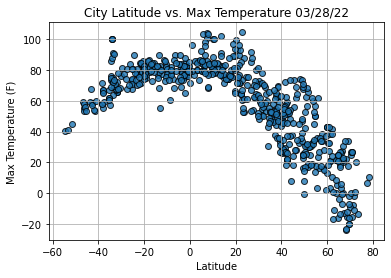

In [55]:
import time
%matplotlib inline
import matplotlib.pyplot as plt

today = time.strftime("%x")

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

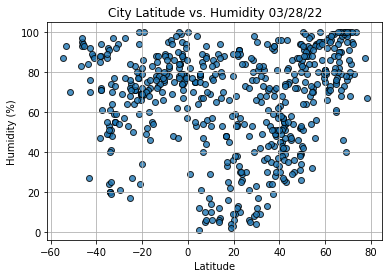

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

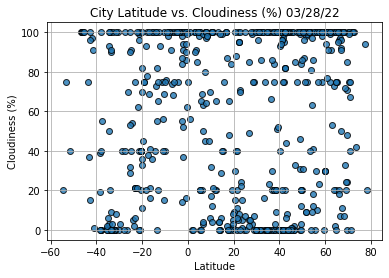

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

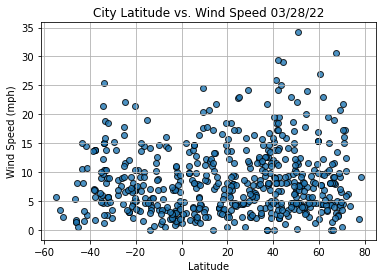

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

#git add / commit / push once I get it working for 500+ cities